# Reading the data into python

This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "BikeRentData.csv". This file contains 17380 Bike Rent data

# Data description

# The business meaning of each column in the data is as below
- **Sl No.** - The Specific ID of the Data
- **season** - (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** - (0: 2011, 1:2012)
- **mnth** - (1 to 12)
- **hr** - (0 to 23)
- **holiday** - Whether that day is holiday or not
- **weekday** - Day of the week
- **workingday** - if day is neither weekend nor holiday , value is 1. Otherwise 0
- **weathersit(Weather situation)** - 1: Clear, 2: Misty, 3: Light Rain, 4: Heavy Rain
- **temp** - Normalized temperature in Celsius. Values are divided to 41 (max)
- **atemp** - Normalized feeling temperature in Celsius. Values are divided to 50 (max)
- **hum** - Normalized humidity. The values are divided to 100 (max)
- **windspeed** - Normalized wind speed. The values are divided to 67 (max)
- **casual** - Count of casual users
- **registered** - Count of registered users
- **cntcr** - Count of total rental bikes including both casual and registered

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
BikeRentData=pd.read_csv('C:/Users/Anonymous/Downloads/TCS Documents/IVY/AI ML/Python Datasets/Regression Datasets/BikeRentData.csv', encoding='latin')
print('Shape before deleting duplicate values:', BikeRentData.shape)

# Removing duplicate rows if any
BikeRentData=BikeRentData.drop_duplicates()
print('Shape After deleting duplicate values:', BikeRentData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BikeRentData.head(10)

Shape before deleting duplicate values: (17379, 16)
Shape After deleting duplicate values: (17379, 16)


,Sl No.,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cntcr
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


# Defining the problem statement:
## Predict the number of bikes getting rented at any day based on the day's weather and bikers data
- **Target Variable**: cntcr
- **Predictors**: day's weather and bikers data etc

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

# Looking at the distribution of Target variable
- If target variable's distribution is too skewed then the predictive modeling will not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

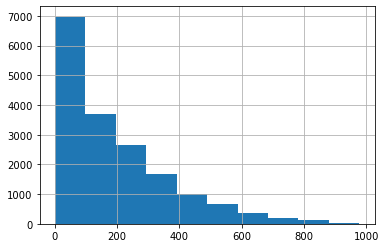

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
BikeRentData['cntcr'].hist()

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the Price of the computer?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
BikeRentData.head()

,Sl No.,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cntcr
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BikeRentData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sl No.      17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cntcr       17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.3 MB


In [5]:
# Looking at the descriptive statistics of the data
BikeRentData.describe(include='all')

,Sl No.,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cntcr
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BikeRentData.nunique()

Sl No.        17379
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cntcr           869
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

- **cntcr** - Continuous. Selected. This is the <b>Target Variable!</b>
- **Sl No.** - Continuous. Not Selected.
- **season** - Categorical. Selected
- **yr** - Categorical. Selected.
- **mnth** - Categorical. Selected.
- **hr** - Categorical. Selected.
- **holiday** - Categorical. Selected.
- **weekday** - Categorical. Selected.
- **workingday** - Categorical. Selected.
- **weathersit** - Categorical. Selected.
- **temp** - Continuous. Selected.
- **atemp** - Continuous. Selected.
- **hum** - Continuous. Selected.
- **windspeed** - Continuous. Selected.
- **casual** - Continuous. Selected.
- **registered** - Continuous. Selected.

# Removing useless columns from the data

There are no qualitative columns in this data

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted eight categorical predictors in the data

<b>Categorical Predictors: </b>

'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit'
    
We use bar charts to see how the data is distributed for these categorical columns.

In [7]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

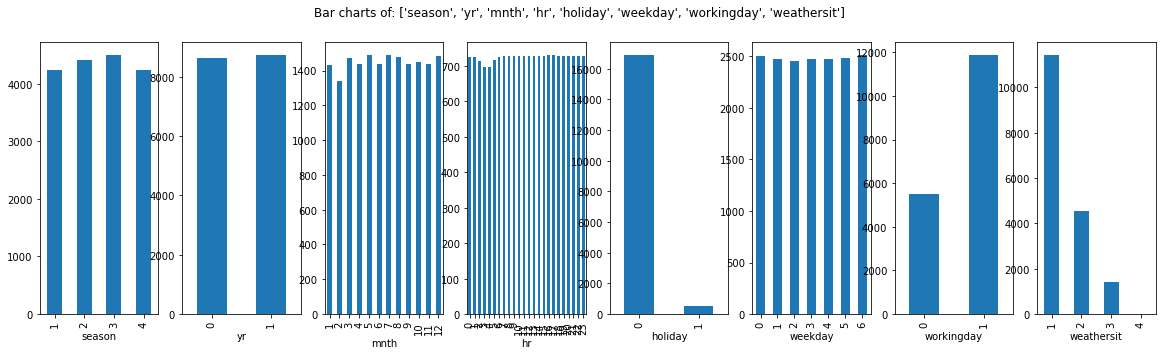

In [8]:
# Calling the function
PlotBarCharts(inpData=BikeRentData, colsToPlot=['season','yr','mnth','hr','holiday','weekday','workingday','weathersit'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'**season**', '**yr**', '**mnth**', '**hr**', '**holiday**', '**weekday**', '**workingday**' , '**weathersit**'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables 
'<b>temp</b>' , '**atemp**' , '**hum**' , '**windspeed**' , '**casual**' , '**registered**'


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E892C91490>,
      dtype=object)

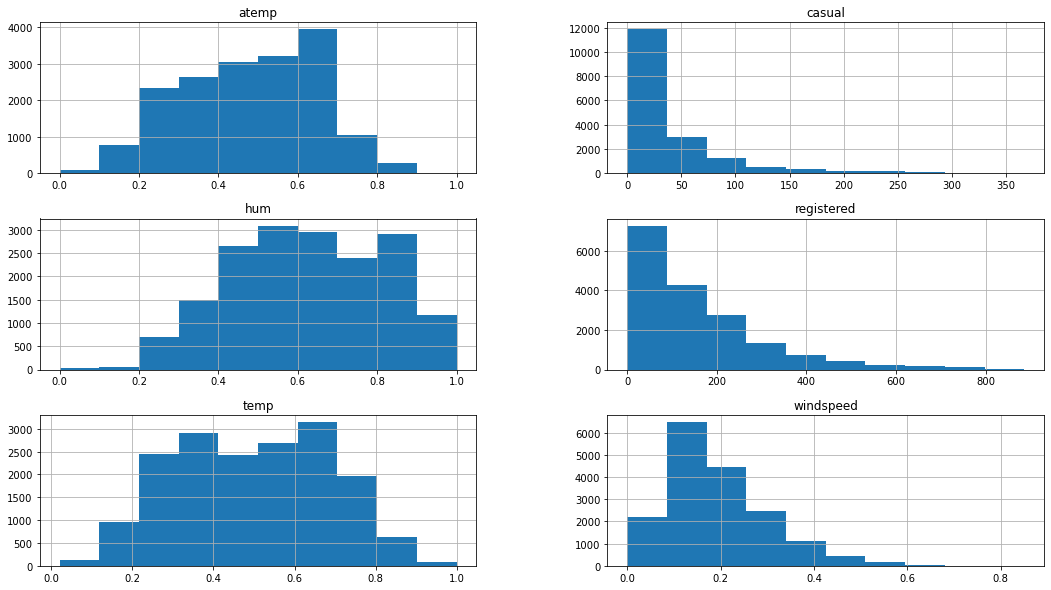

In [9]:
# Plotting histograms of multiple columns together
BikeRentData.hist(['temp','atemp','hum','windspeed','casual','registered'], figsize=(18,10))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. 

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>temp</b> : Selected. The distribution is good.
* <b>atemp</b>: Selected. The distribution is good.
* <b>hum</b>: Selected. The distribution is good. 
* <b>windspeed</b> : Selected. The distribution is good.
* <b>casual</b>: Selected. The distribution is good.
* <b>registered</b>: Selected. The distribution is good.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

We do not have any outliers thus we dont need to treat them, looking at the histogram

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [10]:
# Finding how many missing values are there for each column
BikeRentData.isnull().sum()

Sl No.        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cntcr         0
dtype: int64

<b>We wont be performing missing values treatment as we do not have missing values

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

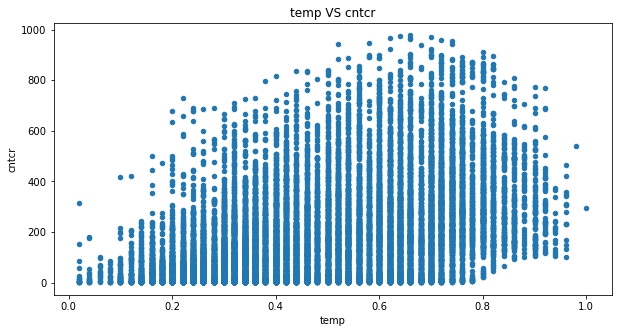

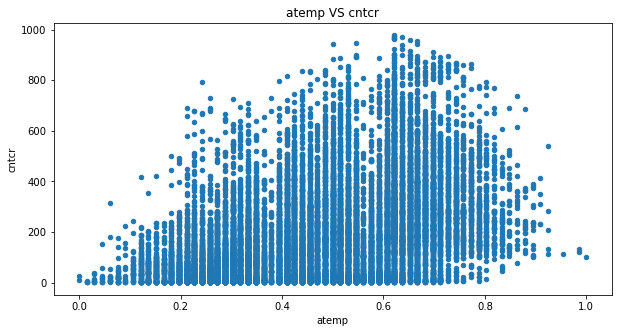

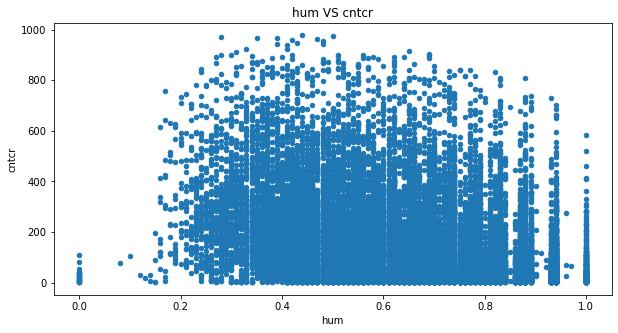

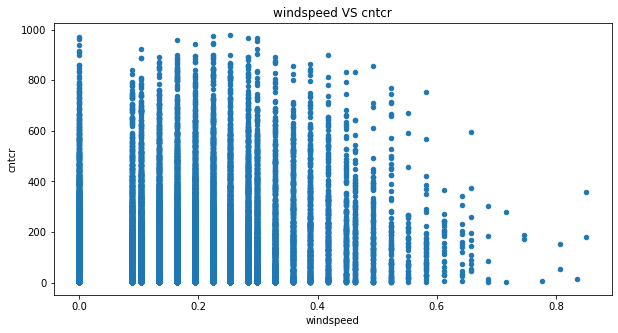

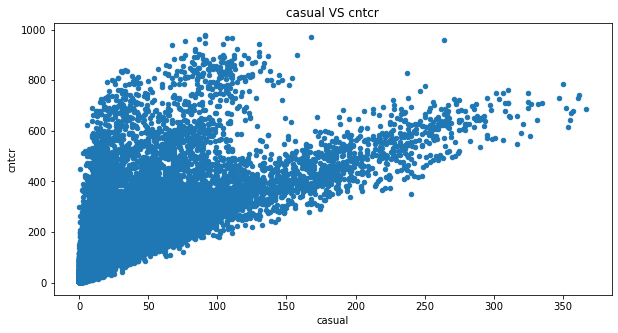

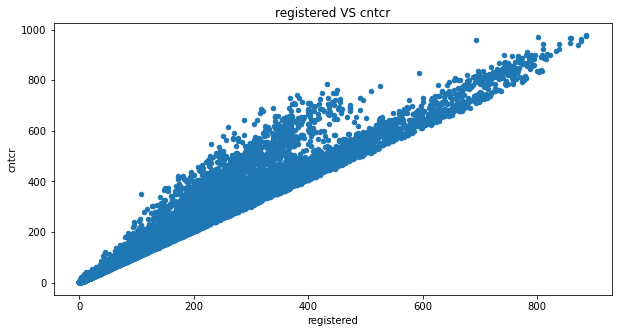

In [11]:
ContinuousCols=['temp','atemp','hum','windspeed','casual','registered']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BikeRentData.plot.scatter(x=predictor, y='cntcr', figsize=(10,5), title=predictor+" VS "+ 'cntcr')

# Scatter charts interpretation
<b>What should you look for in these scatter charts? </b>

Trend.
You should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not.
You confirm this by looking at the correlation value.

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [12]:
# Calculating correlation matrix
ContinuousCols=['cntcr','temp','atemp','hum','windspeed','casual','registered']

# Creating the correlation matrix
CorrelationData=BikeRentData[ContinuousCols].corr()
CorrelationData

,cntcr,temp,atemp,hum,windspeed,casual,registered
cntcr,1.000000,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151
temp,0.404772,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361
atemp,0.400929,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559
hum,-0.322911,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933
windspeed,0.093234,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321
casual,0.694564,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618
registered,0.972151,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000


In [13]:
# Filtering only those columns where absolute correlation > 0.4 with Target Variable
# reduce the 0.4 threshold if no variable is selected
CorrelationData['cntcr'][abs(CorrelationData['cntcr']) > 0.4 ]

cntcr         1.000000
temp          0.404772
atemp         0.400929
casual        0.694564
registered    0.972151
Name: cntcr, dtype: float64

<b>Final selected Continuous columns:</b>

'temp' , 'atemp' , 'hum' , 'casual' , 'registered'

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

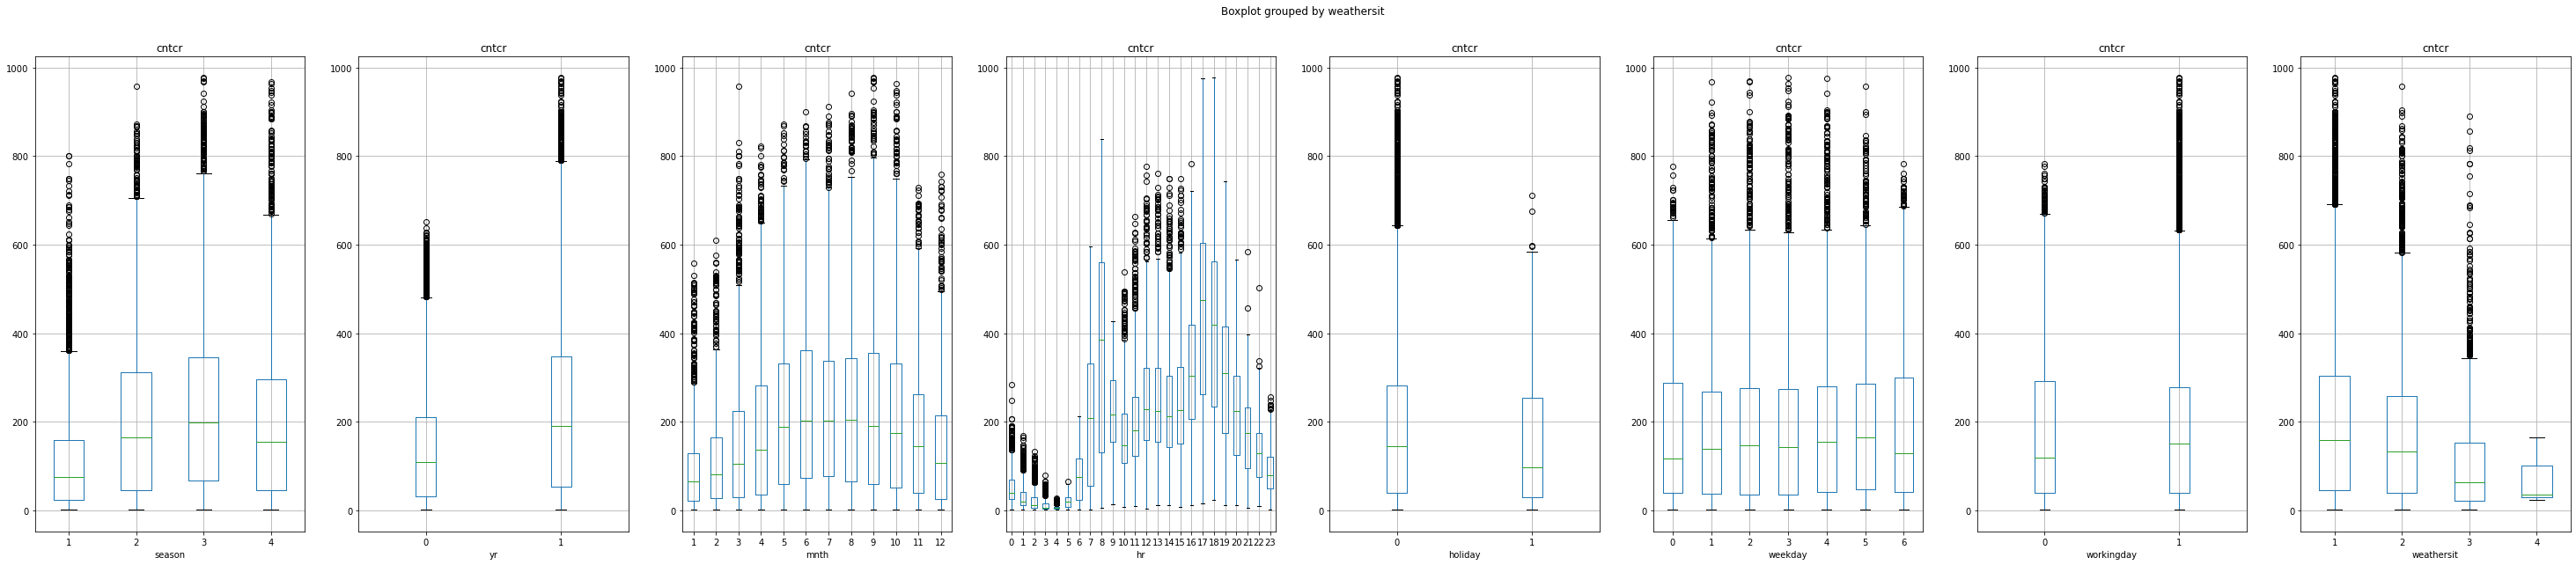

In [14]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "cntcr"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BikeRentData.boxplot(column='cntcr', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

In this data, all the categorical predictors looks correlated with the Target variable except "Fueltype","Automatic" and "MetColor" they seems like a border cases, as the boxes are close to each other.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [15]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [16]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit']
FunctionAnova(inpData=BikeRentData, 
              TargetVariable='cntcr', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

season is correlated with cntcr | P-Value: 7.40107139971279e-257
yr is correlated with cntcr | P-Value: 7.213184208630547e-247
mnth is correlated with cntcr | P-Value: 5.505684936484358e-284
hr is correlated with cntcr | P-Value: 0.0
holiday is correlated with cntcr | P-Value: 4.5461689487233316e-05
weekday is correlated with cntcr | P-Value: 0.0018990310434750582
workingday is correlated with cntcr | P-Value: 6.524264547051995e-05
weathersit is correlated with cntcr | P-Value: 1.7347820521803117e-81


['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable.

<b>Final selected Categorical columns:</b>

'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [17]:
SelectedColumns=['temp','atemp','casual','registered','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit']

# Selecting final columns
DataForML=BikeRentData[SelectedColumns]
DataForML.head()

,temp,atemp,casual,registered,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,0.24,0.2879,3,13,1,0,1,0,0,6,0,1
1,0.22,0.2727,8,32,1,0,1,1,0,6,0,1
2,0.22,0.2727,5,27,1,0,1,2,0,6,0,1
3,0.24,0.2879,3,10,1,0,1,3,0,6,0,1
4,0.24,0.2879,0,1,1,0,1,4,0,6,0,1


In [18]:
# Saving this final data in serialized format for reference during deployment
DataForML.to_pickle('BikeRentDataForML.pkl')
import os
os.getcwd()

'C:\\Users\\Anonymous\\AI DI ML'

In [19]:
import pandas as pd
DataForML=pd.read_pickle('BikeRentDataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable which is in string format.

## Converting the binary nominal variable to numeric using 1/0 mapping

There is no binary nominal variable in string format to be converted

# Converting the nominal variable to numeric using get_dummies()

There is no binary nominal variable in string format to be converted

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [21]:
DataForML_Numeric = DataForML
# Adding Target Variable to the data
DataForML_Numeric['cntcr']=BikeRentData['cntcr']

# Printing all the column names for our reference
DataForML_Numeric=DataForML
DataForML_Numeric.columns

Index(['temp', 'atemp', 'casual', 'registered', 'season', 'yr', 'mnth', 'hr',
       'holiday', 'weekday', 'workingday', 'weathersit', 'cntcr'],
      dtype='object')

In [22]:
# Separate Target Variable and Predictor Variables
TargetVariable='cntcr'
Predictors=['temp','atemp','casual','registered','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit']
#Predictors=['Age','KM']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [23]:
X_train[0:4]

array([[2.600e-01, 2.879e-01, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 1.000e+00],
       [5.200e-01, 5.000e-01, 3.000e+00, 7.000e+00, 3.000e+00, 0.000e+00,
        9.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00],
       [8.600e-01, 8.030e-01, 3.900e+01, 4.720e+02, 3.000e+00, 0.000e+00,
        7.000e+00, 1.800e+01, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00],
       [5.200e-01, 5.000e-01, 5.000e+00, 1.800e+01, 4.000e+00, 0.000e+00,
        9.000e+00, 1.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 1.000e+00]])

In [24]:
y_train[0:5]

array([  2,  10, 511,  23,  37], dtype=int64)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.
Skipping this as the data is in the Standardized/Normalized form .

In [25]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

In [26]:
PredictorScalerFit.inverse_transform(X)

array([[ 0.24  ,  0.2879,  3.    , ...,  6.    ,  0.    ,  1.    ],
       [ 0.22  ,  0.2727,  8.    , ...,  6.    ,  0.    ,  1.    ],
       [ 0.22  ,  0.2727,  5.    , ...,  6.    ,  0.    ,  1.    ],
       ...,
       [ 0.26  ,  0.2576,  7.    , ...,  1.    ,  1.    ,  1.    ],
       [ 0.26  ,  0.2727, 13.    , ...,  1.    ,  1.    ,  1.    ],
       [ 0.26  ,  0.2727, 12.    , ...,  1.    ,  1.    ,  1.    ]])

In [27]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12165, 12)
(12165,)
(5214, 12)
(5214,)


In [28]:
X_train[0:4]

array([[0.51020408, 0.5       , 0.02997275, 0.03724605, 0.33333333,
        0.        , 0.36363636, 1.        , 0.        , 1.        ,
        0.        , 0.66666667],
       [0.81632653, 0.7879    , 0.13896458, 0.18961625, 0.66666667,
        1.        , 0.54545455, 0.39130435, 0.        , 0.        ,
        0.        , 0.        ],
       [0.6122449 , 0.6061    , 0.6239782 , 0.38600451, 0.33333333,
        1.        , 0.36363636, 0.65217391, 0.        , 0.        ,
        0.        , 0.33333333],
       [0.53061224, 0.5152    , 0.00544959, 0.02934537, 0.33333333,
        1.        , 0.36363636, 0.13043478, 0.        , 0.        ,
        0.        , 0.33333333]])

# Multiple Linear Regression

In [29]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale
# Only if you have stadardized the target variable as well

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=LREG.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cntcr']-TestingDataResults['Predictedcntcr']))/TestingDataResults['cntcr'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 1.0

##### Model Validation and Accuracy Calculations ##########
   cntcr  Predictedcntcr  APE
0     80            80.0  0.0
1    290           290.0  0.0
2     95            95.0  0.0
3    249           249.0  0.0
4      2             2.0  0.0
Mean Accuracy on test data: 100.0
Median Accuracy on test data: 100.0

Accuracy values for 10-fold Cross Validation:
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

Final Average Accuracy of the model: 100.0


In [30]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.9399191222228901

##### Model Validation and Accuracy Calculations ##########
   cntcr  Predictedcntcr         APE
0     80            79.0    1.250000
1    290           338.0   16.551724
2     95            79.0   16.842105
3    249           228.0    8.433735
4      2            17.0  750.000000
Mean Accuracy on test data: 38.077672290427685
Median Accuracy on test data: 80.56537102473499

Accuracy values for 10-fold Cross Validation:
 [-52.12459662  30.13847389  57.06068004  51.18341986  28.2558376
  10.79399837  50.69188466  71.41095821  71.12961668  45.33264732]

Final Average Accuracy of the model: 36.39


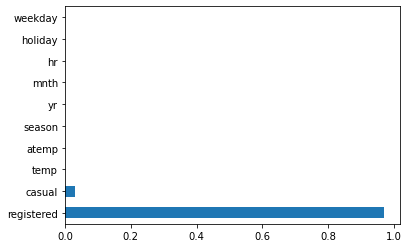

In [31]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cntcr']-TestingDataResults['Predictedcntcr']))/TestingDataResults['cntcr'])



# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cntcr']-TestingDataResults['Predictedcntcr']))/TestingDataResults['cntcr'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [ ]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt
pip install graphviz
conda install graphviz
pip install pydotplus

In [32]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Anonymous/anaconda3/Library/bin/graphviz'

In [33]:
np.var(y_train)

32690.409151289918

In [34]:
np.mean(y_train)

188.51796136457048

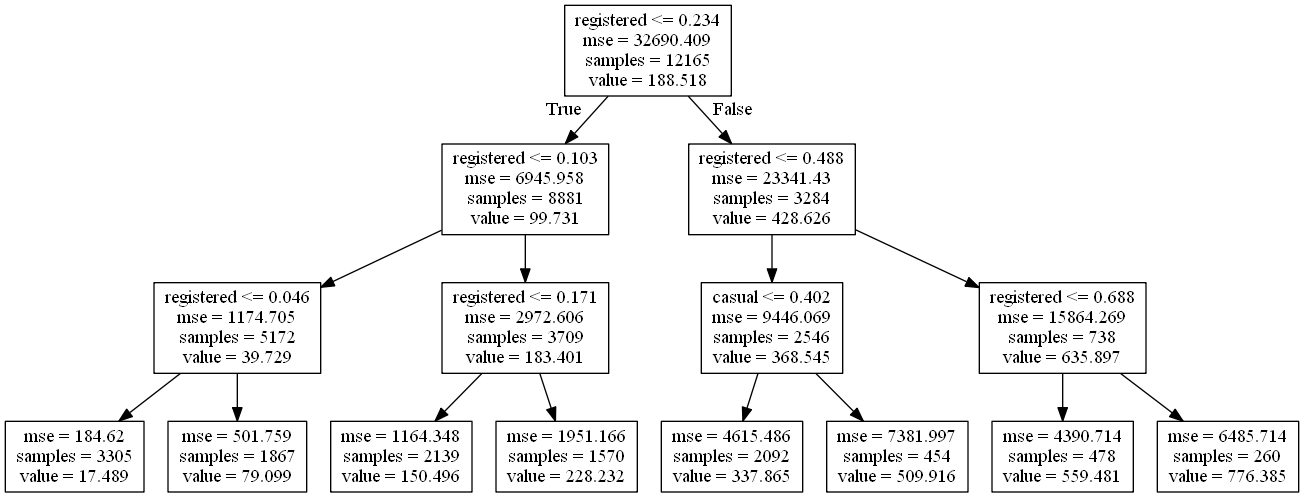

In [35]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## Random Forest

RandomForestRegressor(max_depth=2)
R2 Value: 0.890054314439801

##### Model Validation and Accuracy Calculations ##########
   cntcr  Predictedcntcr
0     80            38.0
1    290           354.0
2     95           134.0
3    249           178.0
4      2            38.0
Mean Accuracy on test data: -40.92330709364293
Median Accuracy on test data: 73.07692307692308

Accuracy values for 10-fold Cross Validation:
 [-234.04431911  -60.49060304    1.16631982  -13.48971613  -64.67393672
 -109.40150814  -15.94968115   36.93020248   38.7617504   -23.3678272 ]

Final Average Accuracy of the model: -44.46


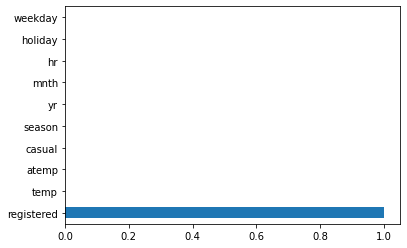

In [36]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cntcr']-TestingDataResults['Predictedcntcr']))/TestingDataResults['cntcr'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting one of the Decision Trees in Random Forest

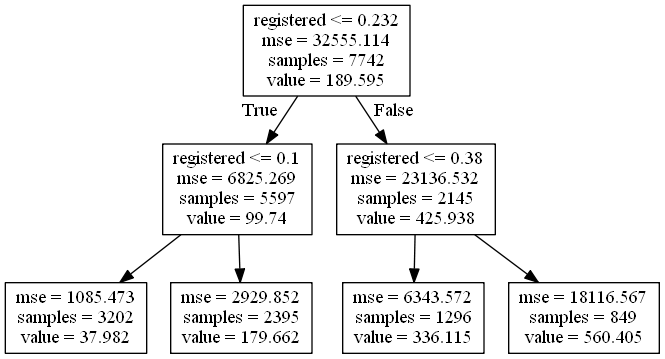

In [37]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[2] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.01, n_estimators=300)
R2 Value: 0.9154236939015239

##### Model Validation and Accuracy Calculations ##########
   cntcr  Predictedcntcr
0     80            48.0
1    290           264.0
2     95            55.0
3    249           205.0
4      2            48.0
Mean Accuracy on test data: -77.59310394454701
Median Accuracy on test data: 73.2876712328767

Accuracy values for 10-fold Cross Validation:
 [-355.01235703 -113.87318995  -25.37254671  -43.95212486 -111.43232646
 -177.34280397  -50.57279428   18.20994436   20.08116982  -56.15607809]

Final Average Accuracy of the model: -89.54


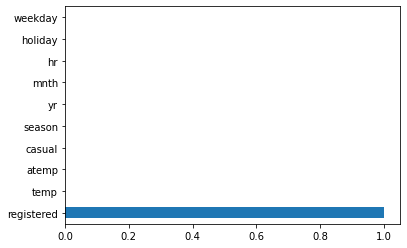

In [38]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 5 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=2)
RegModel = AdaBoostRegressor(n_estimators=300, base_estimator=DTR ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cntcr']-TestingDataResults['Predictedcntcr']))/TestingDataResults['cntcr'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting one of the Decision trees from Adaboost

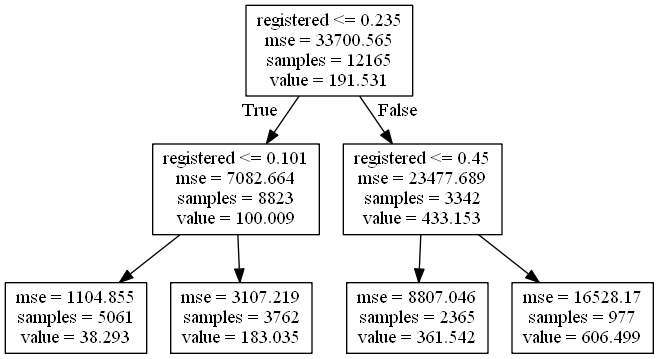

In [39]:
# PLotting 5th single Decision Tree from Adaboost
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[10] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=5000)
# Double click on the graph to zoom in

In [ ]:
# Installing xgboost library
!pip install xgboost

In [40]:
import xgboost

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
R2 Value: 0.9999406559318879

##### Model Validation and Accuracy Calculations ##########
   cntcr  Predictedcntcr
0     80            79.0
1    290           292.0
2     95            93.0
3    249           249.0
4      2             2.0
Mean Accuracy on test data: 99.25275724761414
Median Accuracy on test data: 99.60278

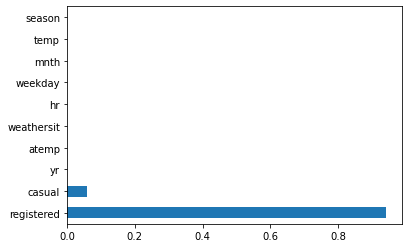

In [41]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=300, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cntcr']-TestingDataResults['Predictedcntcr']))/TestingDataResults['cntcr'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

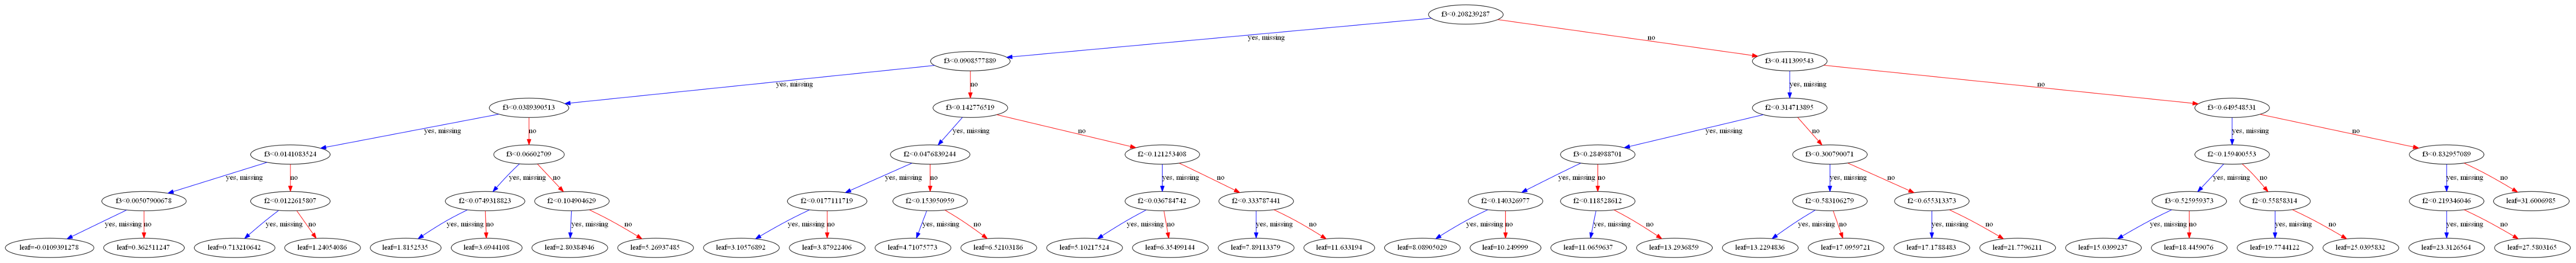

In [42]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 40))
plot_tree(XGB, num_trees=10, ax=ax)
# Double click on the graph to zoom in

## KNN

In [43]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=7)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cntcr']-TestingDataResults['Predictedcntcr']))/TestingDataResults['cntcr'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=7)
R2 Value: 0.9729438756690127

##### Model Validation and Accuracy Calculations ##########
   cntcr  Predictedcntcr
0     80            70.0
1    290           301.0
2     95           103.0
3    249           287.0
4      2             4.0
Mean Accuracy on test data: 42.96958150676388
Median Accuracy on test data: 85.00681198910081

Accuracy values for 10-fold Cross Validation:
 [-56.57196109  23.38256972  53.74229867  38.50504757  -8.43736274
 -28.83606952  32.08531015  65.46290367  61.71715713   2.31468946]

Final Average Accuracy of the model: 18.34


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

I am choosing <b>XGBOOST</b> as the final model since it is producing the best accuracy on this data.

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

## Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'Casual', and 'registered'.

As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [44]:
# Separate Target Variable and Predictor Variables
TargetVariable='cntcr'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
# Predictors=['registered', 'casual']
Predictors=['temp','atemp','casual','registered','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit']
# Selecting final columns
DataForML=BikeRentData[Predictors]
DataForML.to_pickle('BikeRentDataForML.pkl')

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(17379, 12)
(17379,)


In [45]:
X[0:4]

array([[0.2244898 , 0.2879    , 0.00817439, 0.01467269, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.20408163, 0.2727    , 0.02179837, 0.03611738, 0.        ,
        0.        , 0.        , 0.04347826, 0.        , 1.        ,
        0.        , 0.        ],
       [0.20408163, 0.2727    , 0.01362398, 0.03047404, 0.        ,
        0.        , 0.        , 0.08695652, 0.        , 1.        ,
        0.        , 0.        ],
       [0.2244898 , 0.2879    , 0.00817439, 0.01128668, 0.        ,
        0.        , 0.        , 0.13043478, 0.        , 1.        ,
        0.        , 0.        ]])

In [46]:
y[0:4]

array([16, 40, 32, 13], dtype=int64)

In [47]:
DataForML.head()

,temp,atemp,casual,registered,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,0.24,0.2879,3,13,1,0,1,0,0,6,0,1
1,0.22,0.2727,8,32,1,0,1,1,0,6,0,1
2,0.22,0.2727,5,27,1,0,1,2,0,6,0,1
3,0.24,0.2879,3,10,1,0,1,3,0,6,0,1
4,0.24,0.2879,0,1,1,0,1,4,0,6,0,1


#### Cross validating the final model accuracy with less predictors

In [49]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                     learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')
#from sklearn.tree import DecisionTreeRegressor
#RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [96.72273129 98.11324442 98.40012411 98.51622854 98.55498486 98.43148686
 98.61048935 98.91939167 98.88420121 98.79193847]

Final Average Accuracy of the model: 98.39


In [50]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1. Retraining the model using 100% data

In [51]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [52]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Anonymous\AI DI ML


#### Step 3. Create a python function

In [53]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('BikeRentDataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['temp','atemp','casual','registered','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [54]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[0.24,0.2879,3,13,1,0,1,0,0,6,0,1],
     [0.22,0.2727,8,32,1,0,1,1,0,6,0,1],
     [0.22,0.2727,5,27,1,0,1,2,0,6,0,1]],
columns=['temp','atemp','casual','registered','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   temp   atemp  casual  registered  season  yr  mnth  hr  holiday  weekday  \
0  0.24  0.2879       3          13       1   0     1   0        0        6   
1  0.22  0.2727       8          32       1   0     1   1        0        6   
2  0.22  0.2727       5          27       1   0     1   2        0        6   

   workingday  weathersit  
0           0           1  
1           0           1  
2           0           1  


,Prediction
0,16.0
1,40.0
2,31.0


The Function FunctionPredictResult() can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the cases.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

 ## Creating the model with few parameters

# Function for predictions API

In [56]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_temp,inp_atemp,inp_casual,inp_registered,inp_season,inp_yr,inp_mnth,inp_hr,inp_holiday,inp_weekday,inp_workingday,inp_weathersit):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_temp,inp_atemp,inp_casual,inp_registered,inp_season,inp_yr,inp_mnth,inp_hr,inp_holiday,inp_weekday,inp_workingday,inp_weathersit]],
     columns=['temp','atemp','casual','registered','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' , 'weathersit'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_temp=0.28,
inp_atemp=0.288,
inp_casual=15,
inp_registered=50,
inp_season=3,
inp_yr=0,
inp_mnth=5,
inp_hr=22,
inp_holiday=1,
inp_weekday=3,
inp_workingday=1,
inp_weathersit=1
                           )

'{"Prediction":{"0":67.0}}'

In [ ]:
# Installing the flask library required to create the API
!pip install flask

In [57]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [58]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        temp_value=float(request.args.get('temp'))
        atemp_value=float(request.args.get('atemp'))
        casual_value=float(request.args.get('casual'))
        registered_value=float(request.args.get('registered'))
        season_value=float(request.args.get('season'))
        yr_value=float(request.args.get('yr'))
        mnth_value=float(request.args.get('mnth'))
        hr_value=float(request.args.get('hr'))
        holiday_value=float(request.args.get('holiday'))
        weekday_value=float(request.args.get('weekday'))
        workingday_value=float(request.args.get('workingday'))
        weathersit_value=float(request.args.get('weathersit'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                        inp_temp=temp_value,
                                                        inp_atemp=atemp_value,
                                                        inp_casual=casual_value,
                                                        inp_registered=registered_value,
                                                        inp_season=season_value,
                                                        inp_yr=yr_value,
                                                        inp_mnth=mnth_value,
                                                        inp_hr=hr_value,
                                                        inp_holiday=holiday_value,
                                                        inp_weekday=weekday_value,
                                                        inp_workingday=workingday_value,
                                                        inp_weathersit=weathersit_value

                                                        )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [ ]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)


## Sample URL to call the API

#### Copy and paste below URL in the web browser

http://127.0.0.1:8080/prediction_api?temp=0.28&atemp=0.288&casual=15&registered=50&season=3&yr=0&mnth=5&hr=22&holiday=1&weekday=3&workingday=1&weathersit=1



This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.

In [ ]:
import os
os.getcwd()